In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
# Feature importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
## Load the dataset
data = pd.read_csv("../decision-trees/data/marscrater_pds.csv")
data = data.dropna()
data.dtypes

﻿CRATER_ID                 object
CRATER_NAME                object
LATITUDE_CIRCLE_IMAGE     float64
LONGITUDE_CIRCLE_IMAGE    float64
DIAM_CIRCLE_IMAGE         float64
DEPTH_RIMFLOOR_TOPOG      float64
MORPHOLOGY_EJECTA_1        object
MORPHOLOGY_EJECTA_2        object
MORPHOLOGY_EJECTA_3        object
NUMBER_LAYERS               int64
dtype: object

In [3]:
data.describe()

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,NUMBER_LAYERS
count,384343.000000,384343.000000,384343.000000,384343.000000,384343.000000
mean,-7.199209,10.128021,3.556686,0.075838,0.064835
std,33.608966,96.641592,8.591993,0.221518,0.304889
min,-86.700000,-179.997000,1.000000,-0.420000,0.000000
25%,-30.935000,-58.829000,1.180000,0.000000,0.000000
50%,-10.079000,12.740000,1.530000,0.000000,0.000000
75%,17.222500,89.275500,2.550000,0.000000,0.000000
max,85.702000,179.997000,1164.220000,4.950000,5.000000


In [4]:
## our target is going to be whether or not the crater is large
## we're defining large diameter craters as greater than 3 km
data['LARGE_DIAM'] = data.DIAM_CIRCLE_IMAGE >= 3.0
sum(data.LARGE_DIAM == True)

79855

In [7]:
#Split into training and testing sets

predictor_names = ['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS']
predictors = data[predictor_names]

target_names = ['LARGE_DIAM']
targets = data.LARGE_DIAM

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.4)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(230605, 4)
(153738, 4)
(230605L,)
(153738L,)


In [8]:
## Build model on training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[120212,   1640],
       [  6110,  25776]])

In [9]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.94958956146170759

In [12]:
## Fit an extra trees model to the data
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

## display the relative importance of each attribute
print predictor_names
print(model.feature_importances_)

['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS']
[ 0.14123965  0.14261511  0.58021553  0.13592971]


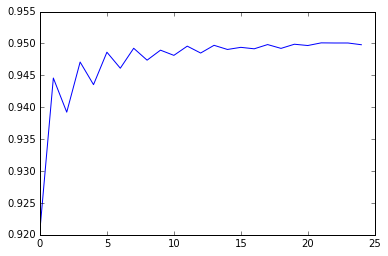

In [13]:
"""
Running a different number of trees to see the effect of that
on the accuracy of prediction
"""
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)

%matplotlib inline
plt.cla()

plt.plot(trees, accuracy)